<a href="https://colab.research.google.com/github/Aim-bro/code_project/blob/main/AI_15_%EC%A1%B0%EC%A4%80%ED%98%95_Section1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 전처리

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
from scipy.stats import norm

In [2]:
df = pd.read_csv('vgames2.csv')

In [3]:
df.head()

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


In [4]:
df.shape

(16598, 10)

In [5]:
df.isnull().sum()

Unnamed: 0       0
Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [6]:
# df[df.Year.isnull()]
# df.shape
df.Platform.unique()

array(['DS', 'Wii', 'PSP', 'PS3', 'PC', 'PS', 'GBA', 'PS4', 'PS2', 'XB',
       'X360', 'GC', '3DS', '2600', 'SAT', 'GB', 'NES', 'DC', 'N64',
       'XOne', 'SNES', 'WiiU', 'PSV', 'GEN', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [7]:
df[df.duplicated()]

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales


In [8]:
df_A = df.copy()

In [9]:
df_A = df_A.drop(df_A[df_A.Year.isnull() | df_A.Genre.isnull() | df_A.Publisher.isnull()].index) # 결측치 제거

In [10]:
df_A = df_A.drop(['Unnamed: 0'],axis=1)

In [11]:
df_A.Year.unique()

array([2.008e+03, 2.009e+03, 2.010e+03, 2.005e+03, 2.011e+03, 2.007e+03,
       2.001e+03, 2.003e+03, 2.006e+03, 2.014e+03, 2.015e+03, 2.002e+03,
       1.997e+03, 2.013e+03, 1.996e+03, 2.004e+03, 2.000e+03, 1.984e+03,
       1.998e+03, 2.016e+03, 1.985e+03, 1.999e+03, 9.000e+00, 9.700e+01,
       1.995e+03, 1.993e+03, 2.012e+03, 1.987e+03, 1.982e+03, 1.100e+01,
       1.994e+03, 1.990e+03, 1.500e+01, 1.992e+03, 1.991e+03, 1.983e+03,
       1.988e+03, 1.981e+03, 3.000e+00, 1.989e+03, 9.600e+01, 6.000e+00,
       8.000e+00, 1.986e+03, 1.000e+00, 5.000e+00, 4.000e+00, 1.000e+01,
       9.800e+01, 7.000e+00, 1.600e+01, 8.600e+01, 1.400e+01, 9.500e+01,
       2.017e+03, 1.980e+03, 2.020e+03, 2.000e+00, 1.300e+01, 0.000e+00,
       1.200e+01, 9.400e+01])

In [12]:
df_A.Year[74]

9.0

In [13]:
df_A.Year.head(76)

0     2008.0
1     2009.0
2     2010.0
3     2010.0
4     2010.0
       ...  
73    2003.0
74       9.0
75    2010.0
76    1985.0
77    2000.0
Name: Year, Length: 76, dtype: float64

In [14]:
cond1 = df_A.Year < 20
df_A.loc[cond1,'Year'] = df_A.loc[cond1,'Year'] + 2000

In [15]:
# df_A[(df_A.Year < 20)].Year
# df_A['Year'] = df_A['Year'].replace([df_A[(df_A.Year < 20)].Year],[df_A[(df_A.Year < 20)].Year+2000])

In [16]:
df_A.Year.head(76)

0     2008.0
1     2009.0
2     2010.0
3     2010.0
4     2010.0
       ...  
73    2003.0
74    2009.0
75    2010.0
76    1985.0
77    2000.0
Name: Year, Length: 76, dtype: float64

In [17]:
cond2 = (df_A.Year < 100) & (df_A.Year > 60)
df_A.loc[cond2,'Year'] = df_A.loc[cond2,'Year'] + 1900

In [18]:
df_A[(df_A.Year < 100) & (df_A.Year > 60)]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales


In [19]:
df_A.Genre.unique()

array(['Action', 'Adventure', 'Misc', 'Platform', 'Sports', 'Simulation',
       'Racing', 'Role-Playing', 'Puzzle', 'Strategy', 'Fighting',
       'Shooter'], dtype=object)

In [20]:
df_A.Year.unique()

array([2008., 2009., 2010., 2005., 2011., 2007., 2001., 2003., 2006.,
       2014., 2015., 2002., 1997., 2013., 1996., 2004., 2000., 1984.,
       1998., 2016., 1985., 1999., 1995., 1993., 2012., 1987., 1982.,
       1994., 1990., 1992., 1991., 1983., 1988., 1981., 1989., 1986.,
       2017., 1980., 2020.])

In [21]:
df_A = df_A.reset_index(drop=True)
df_A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16241 entries, 0 to 16240
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16241 non-null  object 
 1   Platform     16241 non-null  object 
 2   Year         16241 non-null  float64
 3   Genre        16241 non-null  object 
 4   Publisher    16241 non-null  object 
 5   NA_Sales     16241 non-null  object 
 6   EU_Sales     16241 non-null  object 
 7   JP_Sales     16241 non-null  object 
 8   Other_Sales  16241 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.1+ MB


In [22]:
df_A.head(11)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
5,Power Pro Kun Pocket 8,DS,2005.0,Sports,Konami Digital Entertainment,0,0,0.14,0
6,JASF: Jane's Advanced Strike Fighters,PC,2011.0,Simulation,Deep Silver,0.02,0.01,0,0
7,Samurai Warriors: State of War,PSP,2005.0,Action,Tecmo Koei,0.07,0,0.11,0.01
8,Imabikisou,PS3,2007.0,Adventure,Sega,0,0,0.04,0
9,The Penguins of Madagascar: Dr. Blowhole Retur...,PS3,2011.0,Action,THQ,0.04,0.03,0,0.01


In [23]:
df_A[df_A.NA_Sales.str.contains('K')]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
10,Ford Racing,PS,2001.0,Racing,Empire Interactive,480K,0.33M,0K,0.06
44,Resident Evil: Revelations 2,PS3,2015.0,Action,Capcom,60K,0.08,0.16,0.03
142,TOCA Race Driver 3,PC,2006.0,Racing,Codemasters,0K,0.02,0,0
866,Tears to Tiara Anecdotes: The Secret of Avalon,PS3,2009.0,Strategy,Aqua Plus,0K,0,0.04,0
1071,Pro Evolution Soccer 2014,3DS,2013.0,Action,Konami Digital Entertainment,0K,0,0.19,0
...,...,...,...,...,...,...,...,...,...
15308,Championship Manager 2010,PC,2009.0,Sports,Eidos Interactive,0K,0.01,0,0
15846,Vin Diesel: Wheelman,PS3,2009.0,Racing,Ubisoft,120K,0.15,0,0.06
15978,Midway Arcade Treasures,PS2,2003.0,Misc,Midway Games,720K,0.56,0,0.19
16137,Mortal Kombat,PSV,2012.0,Fighting,Warner Bros. Interactive Entertainment,470K,0.18,0,0.12


In [24]:
df_A[df_A.NA_Sales.str.contains('M')]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
439,Medal of Honor: Warfighter,X360,2012.0,Action,Electronic Arts,0.58M,0.47,0.01,0.1
450,F1 2010,PS3,2010.0,Racing,Codemasters,0.25M,0.76,0.08,0.27
568,Mario Kart 64,N64,1996.0,Racing,Nintendo,5.55M,1.94,2.23,0.15
616,The Hobbit,GBA,2003.0,Platform,Vivendi Games,0.14M,0.05,0,0
663,Star Wars The Clone Wars: Lightsaber Duels,Wii,2008.0,Action,LucasArts,1.23M,0.3,0,0.14
...,...,...,...,...,...,...,...,...,...
15642,Juiced 2: Hot Import Nights,PC,2007.0,Racing,THQ,0M,0.01,0,0
15804,Taiko no Tatsujin Wii,Wii,2008.0,Misc,Namco Bandai Games,0M,0,0.67,0
15821,Medal of Honor: Airborne,X360,2007.0,Shooter,Electronic Arts,0.45M,0.53,0.01,0.12
16056,NASCAR 06: Total Team Control,PS2,2005.0,Racing,Electronic Arts,0.53M,0.02,0,0.09


**NA_Sales 데이터 전처리**

In [25]:
def cleaning_N(df):
    li = []
    for row in df['NA_Sales']:
      if row[-1] == 'K':
        result = float(row[:-1])/1000
      elif row[-1] == 'M':
        result = float(row[:-1])
      else :
        result = float(row)

      li.append(result)
    df['NA_Sales'] = li

In [26]:
cleaning_N(df_A)

In [27]:
df_A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16241 entries, 0 to 16240
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16241 non-null  object 
 1   Platform     16241 non-null  object 
 2   Year         16241 non-null  float64
 3   Genre        16241 non-null  object 
 4   Publisher    16241 non-null  object 
 5   NA_Sales     16241 non-null  float64
 6   EU_Sales     16241 non-null  object 
 7   JP_Sales     16241 non-null  object 
 8   Other_Sales  16241 non-null  object 
dtypes: float64(2), object(7)
memory usage: 1.1+ MB


**EU_Sales 데이터 전처리**

In [28]:
def cleaning_E(df):
    li = []
    for row in df['EU_Sales']:
      if row[-1] == 'K':
        result = float(row[:-1])/1000
      elif row[-1] == 'M':
        result = float(row[:-1])
      else :
        result = float(row)

      li.append(result)
    df['EU_Sales'] = li

In [29]:
cleaning_E(df_A)

**JP_Sales 데이터 전처리**

In [30]:
def cleaning_J(df):
    li = []
    for row in df['JP_Sales']:
      if row[-1] == 'K':
        result = float(row[:-1])/1000
      elif row[-1] == 'M':
        result = float(row[:-1])
      else :
        result = float(row)

      li.append(result)
    df['JP_Sales'] = li

In [31]:
cleaning_J(df_A)

**Other_Sales 데이터 전처리**

In [32]:
def cleaning_O(df):
    li = []
    for row in df['Other_Sales']:
      if row[-1] == 'K':
        result = float(row[:-1])/1000
      elif row[-1] == 'M':
        result = float(row[:-1])
      else :
        result = float(row)

      li.append(result)
    df['Other_Sales'] = li

In [33]:
cleaning_O(df_A)

In [34]:
df_A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16241 entries, 0 to 16240
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16241 non-null  object 
 1   Platform     16241 non-null  object 
 2   Year         16241 non-null  float64
 3   Genre        16241 non-null  object 
 4   Publisher    16241 non-null  object 
 5   NA_Sales     16241 non-null  float64
 6   EU_Sales     16241 non-null  float64
 7   JP_Sales     16241 non-null  float64
 8   Other_Sales  16241 non-null  float64
dtypes: float64(5), object(4)
memory usage: 1.1+ MB


In [35]:
df_A.head(11)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04
5,Power Pro Kun Pocket 8,DS,2005.0,Sports,Konami Digital Entertainment,0.00,0.00,0.14,0.00
6,JASF: Jane's Advanced Strike Fighters,PC,2011.0,Simulation,Deep Silver,0.02,0.01,0.00,0.00
7,Samurai Warriors: State of War,PSP,2005.0,Action,Tecmo Koei,0.07,0.00,0.11,0.01
8,Imabikisou,PS3,2007.0,Adventure,Sega,0.00,0.00,0.04,0.00
9,The Penguins of Madagascar: Dr. Blowhole Retur...,PS3,2011.0,Action,THQ,0.04,0.03,0.00,0.01


In [36]:
df_A.Platform.unique()

array(['DS', 'Wii', 'PSP', 'PS3', 'PC', 'PS', 'GBA', 'PS4', 'PS2', 'XB',
       'X360', 'GC', '3DS', '2600', 'SAT', 'GB', 'NES', 'DC', 'N64',
       'XOne', 'SNES', 'WiiU', 'PSV', 'GEN', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [37]:
df_A.loc[df_A.Platform == 'DS','Platform']

0        DS
3        DS
5        DS
13       DS
14       DS
         ..
16199    DS
16206    DS
16216    DS
16224    DS
16228    DS
Name: Platform, Length: 2127, dtype: object

In [38]:
df_A.Platform.value_counts()

DS      2127
PS2     2121
PS3     1299
Wii     1284
X360    1231
PSP     1193
PS      1185
PC       935
XB       799
GBA      784
GC       541
3DS      498
PSV      409
PS4      335
N64      313
SNES     239
XOne     212
SAT      173
WiiU     143
2600     115
NES       98
GB        97
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

In [39]:
df_A['Total_Sales'] = df_A['NA_Sales'] + df_A['EU_Sales'] + df_A['JP_Sales'] + df_A['Other_Sales']
df_A

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00,0.04
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25
...,...,...,...,...,...,...,...,...,...,...
16236,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0.00,0.01,0.20
16237,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0.00,0.00,0.00,0.01
16238,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,0.79
16239,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03,0.38


# groupby

In [40]:
sales_sum = df_A.groupby('Genre')['Total_Sales'].sum().sort_values()
sales_sum

Genre
Strategy         172.98
Adventure        234.02
Puzzle           240.73
Simulation       389.28
Fighting         443.54
Racing           722.55
Misc             779.70
Platform         827.99
Role-Playing     901.51
Shooter         1024.75
Sports          1305.34
Action          1712.98
Name: Total_Sales, dtype: float64

Action          3240
Sports          2299
Misc            1681
Role-Playing    1465
Shooter         1280
Adventure       1268
Racing          1219
Platform         873
Simulation       846
Fighting         835
Strategy         669
Puzzle           566
Name: Genre, dtype: int64

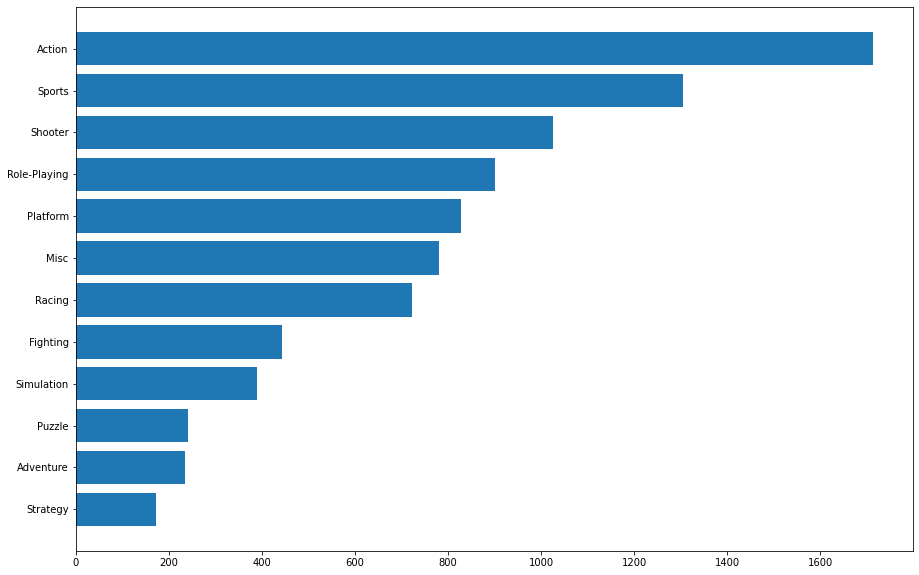

In [41]:
plt.figure(figsize=(15,10))
plt.barh(sales_sum.index,sales_sum)

df_A.Genre.value_counts()

<BarContainer object of 12 artists>

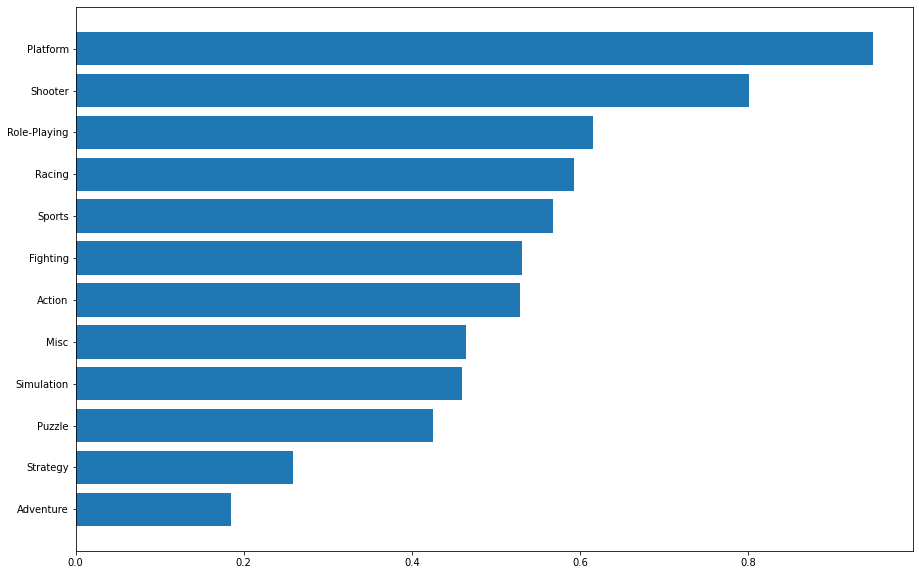

In [42]:
sales_mean = df_A.groupby('Genre')['Total_Sales'].mean().sort_values()
plt.figure(figsize=(15,10))
plt.barh(sales_mean.index,sales_mean)

전체적인 시기로는 Platform 장르가 평균적으로 매출이 잘나왔고 그다음은 Shooter

In [43]:
df_A.groupby('Genre')['Total_Sales'].describe()

,count,mean,std,min,25%,50%,75%,max
Genre,,,,,,,,
Action,3240.0,0.528698,1.166006,0.01,0.07,0.19,0.50,21.39
Adventure,1268.0,0.184558,0.512094,0.01,0.02,0.06,0.16,11.18
Fighting,835.0,0.531186,0.958384,0.01,0.08,0.21,0.56,13.04
Misc,1681.0,0.463831,1.319702,0.01,0.06,0.16,0.41,29.01
Platform,873.0,0.948442,2.602909,0.01,0.09,0.28,0.81,40.24
Puzzle,566.0,0.425318,1.582887,0.01,0.04,0.11,0.30,30.26
Racing,1219.0,0.592740,1.680979,0.00,0.07,0.19,0.53,35.83
Role-Playing,1465.0,0.615365,1.676296,0.01,0.07,0.19,0.53,31.38
Shooter,1280.0,0.800586,1.835254,0.01,0.08,0.23,0.74,28.31


# **Q1. 지역에 따라서 선호하는 게임 장르가 다를까?**

In [44]:
df_A.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00,0.04
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25


In [45]:
df_A.groupby('Platform')['NA_Sales'].sum().sort_values(ascending=False).head()

Platform
X360    593.78
PS2     568.54
Wii     495.10
PS3     388.00
DS      387.93
Name: NA_Sales, dtype: float64

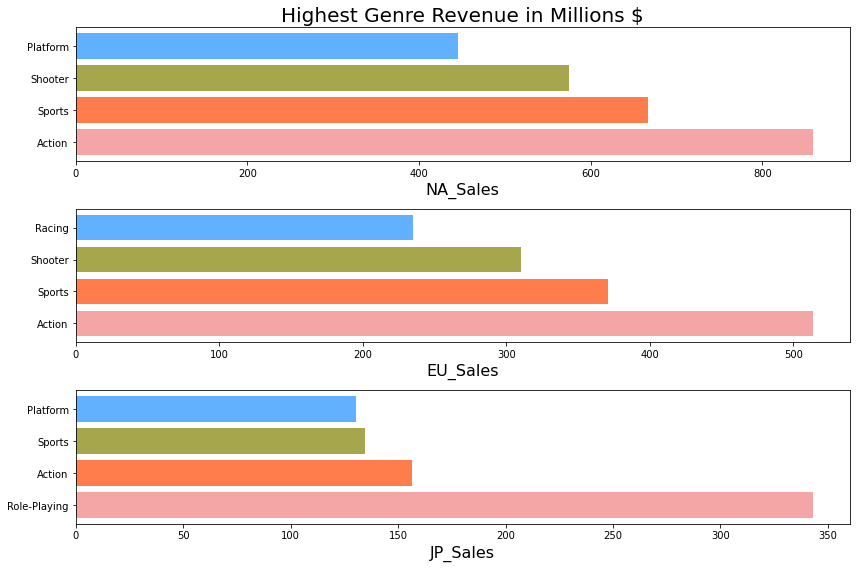

In [46]:

colors =  {'Action':"orchid", 'Sports':"mediumslateblue", 'Shooter':"cornflowerblue", 'Role-Playing':"steelblue"}

NA = df_A.groupby(['Genre'])['NA_Sales'].sum().sort_values(ascending=False).head(4)
NA_genres = NA.index

EU = df_A.groupby(['Genre'])['EU_Sales'].sum().sort_values(ascending=False).head(4)
EU_genres = EU.index

JP = df_A.groupby(['Genre'])['JP_Sales'].sum().sort_values(ascending=False).head(4)
JP_genres = JP.index

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(3,1,1)
plt.barh(NA_genres,NA,color = ['lightcoral','orangered','olive','dodgerblue'],alpha = 0.7)
ax1.set_title(label='Highest Genre Revenue in Millions $', fontsize=20)
ax1.set_xlabel(xlabel='NA_Sales', fontsize=16)

ax2 = fig.add_subplot(3,1,2)
plt.barh(EU_genres,EU,color = ['lightcoral','orangered','olive','dodgerblue'],alpha = 0.7)
ax2.set_xlabel(xlabel='EU_Sales', fontsize=16)

ax3 = fig.add_subplot(3,1,3)
plt.barh(JP_genres,JP,color = ['lightcoral','orangered','olive','dodgerblue'],alpha = 0.7)
ax3.set_xlabel(xlabel='JP_Sales', fontsize=16)
fig.tight_layout()
plt.show()

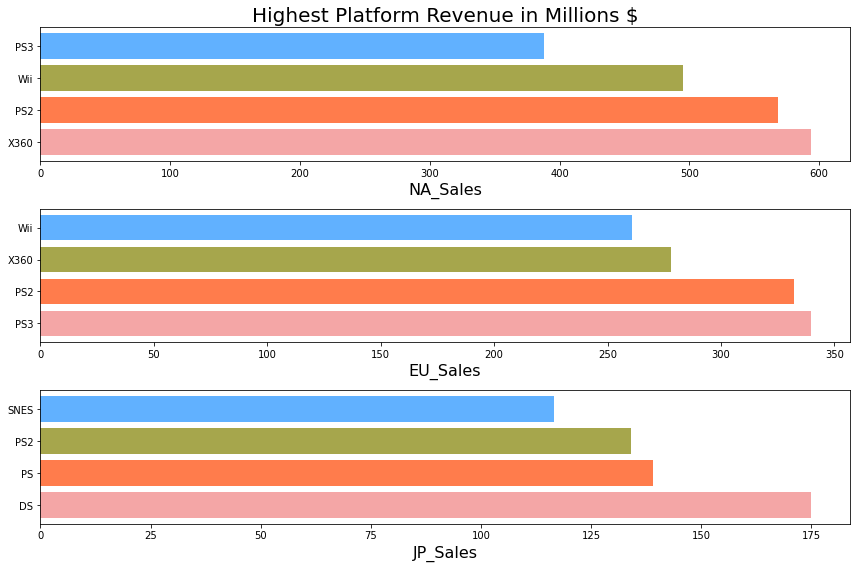

In [47]:

colors =  {'Action':"orchid", 'Sports':"mediumslateblue", 'Shooter':"cornflowerblue", 'Role-Playing':"steelblue"}

NA = df_A.groupby(['Platform'])['NA_Sales'].sum().sort_values(ascending=False).head(4)
NA_genres = NA.index

EU = df_A.groupby(['Platform'])['EU_Sales'].sum().sort_values(ascending=False).head(4)
EU_genres = EU.index

JP = df_A.groupby(['Platform'])['JP_Sales'].sum().sort_values(ascending=False).head(4)
JP_genres = JP.index

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(3,1,1)
plt.barh(NA_genres,NA,color = ['lightcoral','orangered','olive','dodgerblue'],alpha = 0.7)
ax1.set_title(label='Highest Platform Revenue in Millions $', fontsize=20)
ax1.set_xlabel(xlabel='NA_Sales', fontsize=16)

ax2 = fig.add_subplot(3,1,2)
plt.barh(EU_genres,EU,color = ['lightcoral','orangered','olive','dodgerblue'],alpha = 0.7)
ax2.set_xlabel(xlabel='EU_Sales', fontsize=16)

ax3 = fig.add_subplot(3,1,3)
plt.barh(JP_genres,JP,color = ['lightcoral','orangered','olive','dodgerblue'],alpha = 0.7)
ax3.set_xlabel(xlabel='JP_Sales', fontsize=16)
fig.tight_layout()
plt.show()

### 3coun pairplot

In [48]:
# df_3coun = df_A.drop('Other_Sales',axis=1)

In [49]:
# sns.pairplot(data = df_3coun,hue='Genre')
# plt.show

### 연습

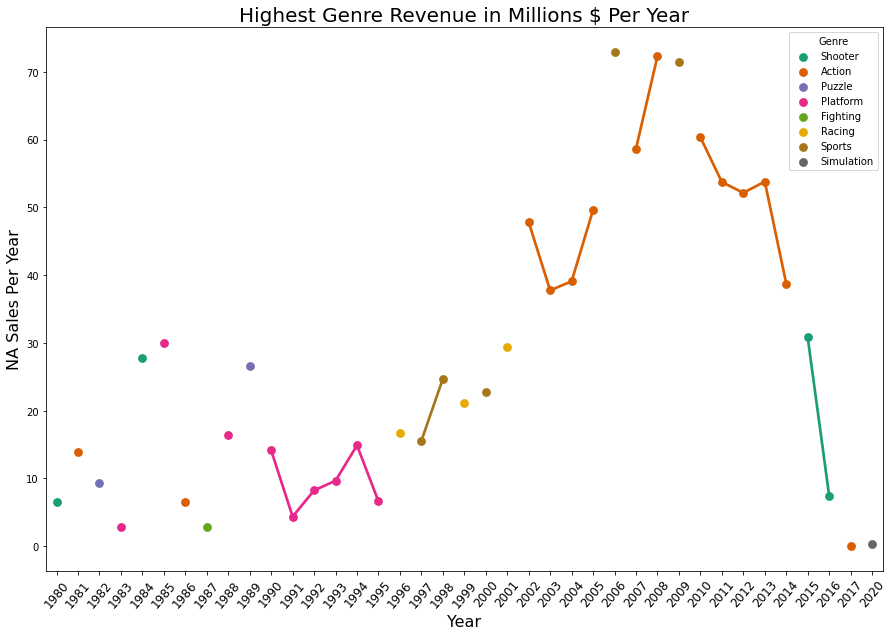

In [50]:
table_NA = df_A.pivot_table('NA_Sales', index='Genre', columns='Year', aggfunc='sum')
genres = table_NA.idxmax()
sales = table_NA.max()
years = table_NA.columns.astype(int)
data = pd.concat([genres, sales], axis=1)
data.columns = ['Genre', 'NA_Sales']

plt.figure(figsize=(15,10))
ax = sns.pointplot(y = 'NA_Sales', x = years, hue='Genre', data=data, size=15, palette='Dark2')
ax.set_xlabel(xlabel='Year', fontsize=16)
ax.set_ylabel(ylabel='NA Sales Per Year', fontsize=16)
ax.set_title(label='Highest Genre Revenue in Millions $ Per Year', fontsize=20)
ax.set_xticklabels(labels = years, fontsize=12, rotation=50)
plt.show();

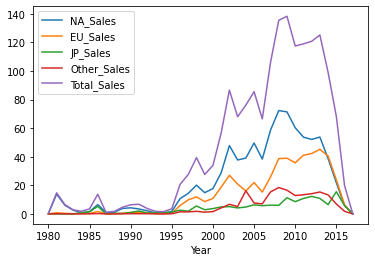

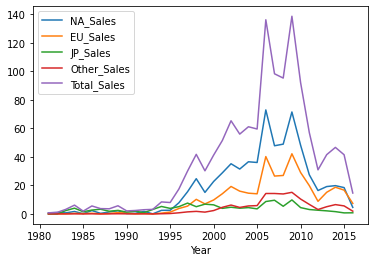

In [51]:
df_Act = df_A[df_A.Genre == 'Action']
df_Act = df_Act.groupby('Year').sum().plot()

df_Sports = df_A[df_A.Genre == 'Sports']
df_Sports.groupby('Year').sum().plot()
# df_Act.groupby('Year')['JP_Sales'].sum().to_frame().plot()

# plt.show()

# **Q2. 연도별 게임의 트렌드가 있을까?**

In [52]:
df_A.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00,0.04
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25


## 90년대 이전 트렌드

In [53]:
sales_past = df_A[df_A.Year<1990]
print(sales_past.shape)
sales_past.groupby('Genre')['Total_Sales'].describe()

(204, 10)


,count,mean,std,min,25%,50%,75%,max
Genre,,,,,,,,
Action,66.0,0.774242,1.045678,0.02,0.3100,0.410,0.6925,6.50
Adventure,2.0,2.390000,2.814285,0.40,1.3950,2.390,3.3850,4.38
Fighting,4.0,1.810000,1.075701,0.77,0.9800,1.725,2.5550,3.02
Misc,8.0,1.055000,0.623813,0.23,0.7200,1.100,1.3225,2.14
Platform,33.0,3.704848,7.744015,0.51,0.9600,1.230,1.6700,40.24
Puzzle,19.0,3.302632,6.856302,0.06,0.5900,1.100,1.8000,30.26
Racing,8.0,1.512500,1.286399,0.27,0.4575,1.350,2.0050,4.16
Role-Playing,9.0,1.694444,1.052902,0.76,1.1000,1.250,2.5200,3.87
Shooter,30.0,1.992333,5.040259,0.22,0.5100,1.025,1.3300,28.31


Text(0.5, 1.0, 'Highest Genre Revenue in Millions $ before 90s')

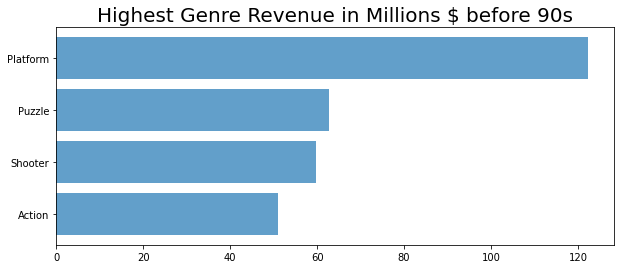

In [54]:
sales_past_sum = sales_past.groupby('Genre')['Total_Sales'].sum().sort_values().tail(4)
plt.figure(figsize=(10,4))
plt.barh(sales_past_sum.index,sales_past_sum, alpha = 0.7)
plt.title(label='Highest Genre Revenue in Millions $ before 90s', fontsize=20)


In [55]:
sales_past[sales_past.Genre == 'Platform'].sort_values(by='Total_Sales',ascending=False).head(3)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
4113,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
9307,Super Mario Land,GB,1989.0,Platform,Nintendo,10.83,2.71,4.18,0.42,18.14
14540,Super Mario Bros. 3,NES,1988.0,Platform,Nintendo,9.54,3.44,3.84,0.46,17.28


In [56]:
sales_past[sales_past.Genre == 'Puzzle'].sort_values(by='Total_Sales',ascending=False).head(3)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
1187,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
5699,Pac-Man,2600,1982.0,Puzzle,Atari,7.28,0.45,0.00,0.08,7.81
10832,Tetris,NES,1988.0,Puzzle,Nintendo,2.97,0.69,1.81,0.11,5.58


In [57]:
sales_past[sales_past.Genre == 'Shooter'].sort_values(by='Total_Sales',ascending=False).head(3)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
10280,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31
5604,Asteroids,2600,1980.0,Shooter,Atari,4.00,0.26,0.00,0.05,4.31
14691,Missile Command,2600,1980.0,Shooter,Atari,2.56,0.17,0.00,0.03,2.76


## 90년대 트렌드

In [58]:
sales_90 = df_A[(1990 <= df_A.Year) & (df_A.Year < 2000)]
print(sales_90.shape)
sales_90.groupby('Genre')['Total_Sales'].describe().sort_values(by='mean',ascending=False)

(1764, 10)


,count,mean,std,min,25%,50%,75%,max
Genre,,,,,,,,
Platform,125.0,1.670960,2.803314,0.02,0.1600,0.560,1.7600,20.62
Role-Playing,171.0,1.068830,3.276154,0.02,0.1300,0.320,0.7900,31.38
Action,161.0,0.864286,1.403780,0.01,0.1000,0.310,0.8500,7.60
Racing,181.0,0.822155,1.583763,0.01,0.1100,0.300,0.9000,10.95
Fighting,193.0,0.639948,1.071980,0.01,0.1100,0.250,0.7100,7.18
Simulation,86.0,0.605116,0.797320,0.02,0.1125,0.305,0.8725,5.11
Misc,115.0,0.551565,0.887436,0.01,0.0700,0.200,0.5350,5.31
Puzzle,71.0,0.548451,0.742176,0.02,0.0850,0.300,0.7700,4.84
Shooter,137.0,0.502847,1.018709,0.02,0.0700,0.160,0.4200,8.09


<BarContainer object of 4 artists>

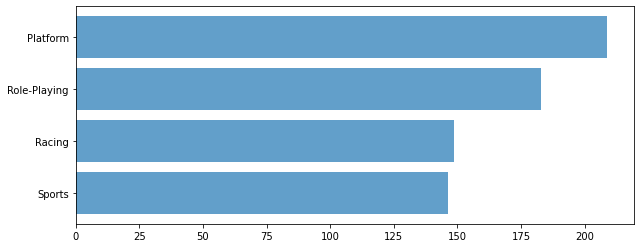

In [59]:
sales_90_sum = sales_90.groupby('Genre')['Total_Sales'].sum().sort_values().tail(4)
plt.figure(figsize=(10,4))
plt.barh(sales_90_sum.index,sales_90_sum,alpha=0.7)

In [60]:
sales_90[sales_90.Genre == 'Platform'].sort_values(by='Total_Sales',ascending=False).head(5)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
12837,Super Mario World,SNES,1990.0,Platform,Nintendo,12.78,3.75,3.54,0.55,20.62
6322,Super Mario 64,N64,1996.0,Platform,Nintendo,6.91,2.85,1.91,0.23,11.90
2952,Super Mario All-Stars,SNES,1993.0,Platform,Nintendo,5.99,2.15,2.12,0.29,10.55
6985,Donkey Kong Country,SNES,1994.0,Platform,Nintendo,4.36,1.71,3.00,0.23,9.30
1082,Crash Bandicoot 2: Cortex Strikes Back,PS,1997.0,Platform,Sony Computer Entertainment,3.78,2.17,1.31,0.31,7.57


In [61]:
sales_90[sales_90.Genre == 'Role-Playing'].sort_values(by='Total_Sales',ascending=False).head(5)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
7673,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38
9233,Pokemon Gold/Pokemon Silver,GB,1999.0,Role-Playing,Nintendo,9.00,6.18,7.20,0.71,23.09
8363,Pokémon Yellow: Special Pikachu Edition,GB,1998.0,Role-Playing,Nintendo,5.89,5.04,3.12,0.59,14.64
11460,Final Fantasy VII,PS,1997.0,Role-Playing,Sony Computer Entertainment,3.01,2.47,3.28,0.96,9.72
6000,Final Fantasy VIII,PS,1999.0,Role-Playing,SquareSoft,2.28,1.72,3.63,0.23,7.86


In [62]:
sales_90[sales_90.Genre == 'Racing'].sort_values(by='Total_Sales',ascending=False).head(5)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
4707,Gran Turismo,PS,1997.0,Racing,Sony Computer Entertainment,4.02,3.87,2.54,0.52,10.95
568,Mario Kart 64,N64,1996.0,Racing,Nintendo,5.55,1.94,2.23,0.15,9.87
6367,Gran Turismo 2,PS,1999.0,Racing,Sony Computer Entertainment,3.88,3.42,1.69,0.50,9.49
9397,Super Mario Kart,SNES,1992.0,Racing,Nintendo,3.54,1.24,3.81,0.18,8.77
5515,Diddy Kong Racing,N64,1997.0,Racing,Nintendo,2.91,0.99,0.89,0.10,4.89


90년대 초반까진 여전히 Platform장르의 게임들이 여전히 상위권을 차지했지만 후반에 들어서면서 롤플레잉 장르의 강세를 보여주고있다.

## 2000~2004년 게임 트렌드

In [63]:
sales_00 = df_A[(2000 <= df_A.Year) & (df_A.Year < 2005)]
print(sales_00.shape)
sales_00.groupby('Genre')['Total_Sales'].describe()

(3168, 10)


,count,mean,std,min,25%,50%,75%,max
Genre,,,,,,,,
Action,503.0,0.638867,1.520924,0.01,0.080,0.220,0.5500,20.81
Adventure,127.0,0.264252,0.383144,0.01,0.065,0.150,0.3100,2.25
Fighting,184.0,0.564293,0.891713,0.01,0.110,0.235,0.6000,7.06
Misc,211.0,0.461896,0.666663,0.01,0.100,0.220,0.5000,4.23
Platform,297.0,0.644747,1.106578,0.01,0.090,0.250,0.6400,10.42
Puzzle,79.0,0.344557,0.572788,0.01,0.040,0.090,0.3250,2.94
Racing,396.0,0.514571,1.246055,0.01,0.080,0.160,0.4625,14.97
Role-Playing,232.0,0.777543,1.701002,0.01,0.090,0.245,0.6500,15.84
Shooter,295.0,0.519661,0.988128,0.01,0.080,0.170,0.5450,8.48


In [64]:
sales_00.groupby('Genre')['Total_Sales'].sum().sort_values()

Genre
Puzzle           27.22
Adventure        33.56
Strategy         36.66
Simulation       65.83
Misc             97.46
Fighting        103.83
Shooter         153.30
Role-Playing    180.39
Platform        191.49
Racing          203.77
Sports          275.09
Action          321.35
Name: Total_Sales, dtype: float64

<BarContainer object of 4 artists>

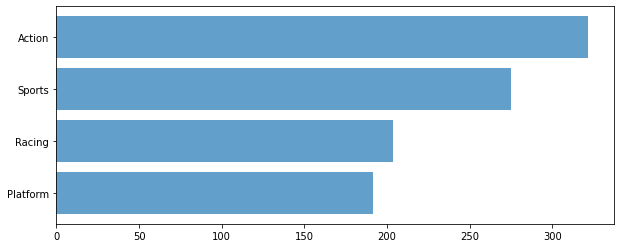

In [65]:
sales_00_sum = sales_00.groupby('Genre')['Total_Sales'].sum().sort_values().tail(4)
plt.figure(figsize=(10,4))
plt.barh(sales_00_sum.index,sales_00_sum,alpha=0.7)

In [66]:
sales_00[sales_00.Genre == 'Action'].sort_values(by='Total_Sales',ascending=False).head(3)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
14355,Grand Theft Auto: San Andreas,PS2,2004.0,Action,Take-Two Interactive,9.43,0.40,0.41,10.57,20.81
5226,Grand Theft Auto: Vice City,PS2,2002.0,Action,Take-Two Interactive,8.41,5.49,0.47,1.78,16.15
9597,Grand Theft Auto III,PS2,2001.0,Action,Take-Two Interactive,6.99,4.51,0.30,1.30,13.10


In [67]:
sales_00[sales_00.Genre == 'Sports'].sort_values(by='Total_Sales',ascending=False).head(3)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
7218,Tony Hawk's Pro Skater 2,PS,2000.0,Sports,Activision,3.05,1.41,0.02,0.20,4.68
16234,Madden NFL 2005,PS2,2004.0,Sports,Electronic Arts,4.18,0.26,0.01,0.08,4.53
7351,Tony Hawk's Pro Skater 3,PS2,2001.0,Sports,Activision,2.66,1.29,0.01,0.46,4.42


## 2005년 ~ 2009년 트렌드

In [68]:
sales_05 = df_A[(2005 <= df_A.Year) & (df_A.Year < 2010)]
print(sales_05.shape)
sales_05.groupby('Genre')['Total_Sales'].describe()

(5985, 10)


,count,mean,std,min,25%,50%,75%,max
Genre,,,,,,,,
Action,1076.0,0.494219,0.997031,0.01,0.08,0.205,0.4925,11.90
Adventure,504.0,0.178631,0.423445,0.01,0.02,0.060,0.1700,5.55
Fighting,258.0,0.493915,1.032866,0.01,0.06,0.160,0.5075,13.04
Misc,786.0,0.484822,1.509244,0.01,0.06,0.140,0.4100,29.01
Platform,268.0,0.688955,2.675307,0.01,0.08,0.170,0.4800,30.01
Puzzle,282.0,0.321418,1.069372,0.01,0.04,0.100,0.2300,15.30
Racing,401.0,0.584115,2.218593,0.00,0.06,0.180,0.5100,35.83
Role-Playing,497.0,0.466419,1.186604,0.01,0.06,0.150,0.3900,18.35
Shooter,423.0,0.662293,1.454145,0.01,0.06,0.190,0.6450,13.52


<BarContainer object of 4 artists>

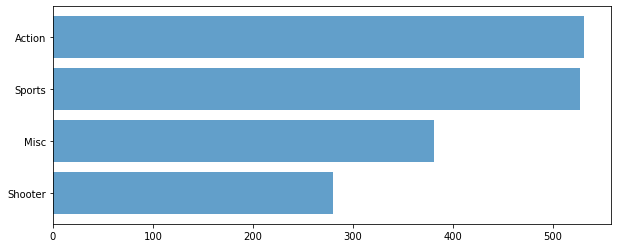

In [69]:
sales_05_sum = sales_05.groupby('Genre')['Total_Sales'].sum().sort_values().tail(4)
plt.figure(figsize=(10,4))
plt.barh(sales_05_sum.index,sales_05_sum,alpha = 0.7)

In [70]:
sales_05[sales_05.Genre == 'Action'].sort_values(by='Total_Sales',ascending=False).head(3)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
4704,Pokemon HeartGold/Pokemon SoulSilver,DS,2009.0,Action,Nintendo,4.40,2.77,3.96,0.77,11.90
13626,Grand Theft Auto IV,X360,2008.0,Action,Take-Two Interactive,6.76,3.10,0.14,1.03,11.03
16120,Grand Theft Auto IV,PS3,2008.0,Action,Take-Two Interactive,4.76,3.76,0.44,1.62,10.58


In [71]:
sales_05[sales_05.Genre == 'Sports'].sort_values(by='Total_Sales',ascending=False).head(3)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
2855,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
3288,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
3367,Wii Fit,Wii,2007.0,Sports,Nintendo,8.94,8.03,3.60,2.15,22.72


In [72]:
sales_05[sales_05.Genre == 'Misc'].sort_values(by='Total_Sales',ascending=False).head(3)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
2959,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.01
12950,Brain Age: Train Your Brain in Minutes a Day,DS,2005.0,Misc,Nintendo,4.75,9.26,4.16,2.05,20.22
7549,Mario Party DS,DS,2007.0,Misc,Nintendo,4.46,1.88,1.98,0.70,9.02


## 2010 ~ 2014년 트렌드

In [73]:
sales_10 = df_A[(2010 <= df_A.Year) & (df_A.Year < 2015)]
print(sales_10.shape)
sales_10.groupby('Genre')['Total_Sales'].describe()

(4163, 10)


,count,mean,std,min,25%,50%,75%,max
Genre,,,,,,,,
Action,1062.0,0.547552,1.237884,0.01,0.08,0.20,0.5100,21.39
Adventure,452.0,0.112942,0.290219,0.01,0.02,0.04,0.1000,3.23
Fighting,161.0,0.434161,0.790446,0.01,0.08,0.20,0.5000,7.44
Misc,504.0,0.429544,1.366088,0.01,0.06,0.14,0.3125,21.82
Platform,126.0,0.893651,1.695200,0.01,0.10,0.26,1.0225,10.79
Puzzle,109.0,0.187982,0.374939,0.01,0.03,0.07,0.1400,2.68
Racing,194.0,0.587887,1.373395,0.01,0.08,0.19,0.5400,12.21
Role-Playing,436.0,0.568968,1.319025,0.01,0.06,0.16,0.5225,15.32
Shooter,329.0,1.150000,2.323219,0.01,0.12,0.41,0.9800,14.76


<BarContainer object of 4 artists>

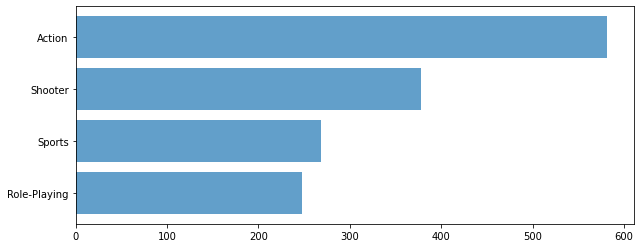

In [74]:
sales_10_sum = sales_10.groupby('Genre')['Total_Sales'].sum().sort_values().tail(4)
plt.figure(figsize=(10,4))
plt.barh(sales_10_sum.index,sales_10_sum,alpha = 0.7)

In [75]:
sales_10[sales_10.Genre == 'Action'].sort_values(by='Total_Sales',ascending=False).head(3)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
3414,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.39
10695,Grand Theft Auto V,X360,2013.0,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38
1973,Grand Theft Auto V,PS4,2014.0,Action,Take-Two Interactive,3.80,5.81,0.36,2.02,11.99


In [76]:
sales_10[sales_10.Genre == 'Shooter'].sort_values(by='Total_Sales',ascending=False).head(3)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
2757,Call of Duty: Modern Warfare 3,X360,2011.0,Shooter,Activision,9.03,4.28,0.13,1.32,14.76
6119,Call of Duty: Black Ops,X360,2010.0,Shooter,Activision,9.67,3.73,0.11,1.13,14.64
4152,Call of Duty: Black Ops II,PS3,2012.0,Shooter,Activision,4.99,5.88,0.65,2.52,14.04


In [77]:
sales_10[sales_10.Genre == 'Sports'].sort_values(by='Total_Sales',ascending=False).head(3)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
2671,FIFA 14,PS3,2013.0,Sports,Electronic Arts,0.78,4.32,0.07,1.73,6.90
14471,Zumba Fitness,Wii,2010.0,Sports,505 Games,3.50,2.64,0.00,0.67,6.81
13203,FIFA 12,PS3,2011.0,Sports,Electronic Arts,0.84,4.32,0.11,1.42,6.69


## 2015 ~ 2020 트렌드

In [78]:
sales_15 = df_A[(2015 <= df_A.Year) & (df_A.Year <= 2020)]
print(sales_15.shape)
sales_15.groupby('Genre')['Total_Sales'].describe()

(957, 10)


,count,mean,std,min,25%,50%,75%,max
Genre,,,,,,,,
Action,372.0,0.236828,0.519256,0.01,0.020,0.070,0.2000,4.47
Adventure,86.0,0.113953,0.262357,0.01,0.020,0.030,0.0600,1.63
Fighting,35.0,0.332286,0.541909,0.01,0.035,0.090,0.3250,2.70
Misc,57.0,0.224737,0.310840,0.01,0.030,0.060,0.3500,1.54
Platform,24.0,0.338750,0.692954,0.01,0.030,0.080,0.2500,3.18
Puzzle,6.0,0.115000,0.167899,0.01,0.025,0.050,0.0975,0.45
Racing,39.0,0.245897,0.485948,0.01,0.030,0.070,0.2250,2.39
Role-Playing,120.0,0.360167,0.846016,0.01,0.040,0.100,0.2800,6.96
Shooter,66.0,1.277121,2.283748,0.01,0.130,0.390,1.6375,14.24


<BarContainer object of 4 artists>

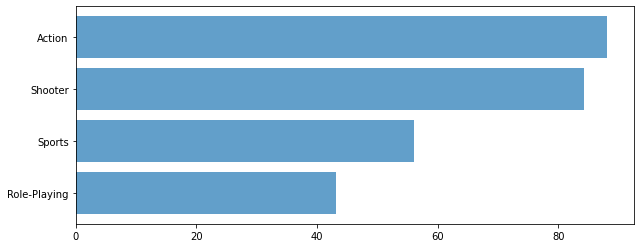

In [79]:
sales_15_sum = sales_15.groupby('Genre')['Total_Sales'].sum().sort_values().tail(4)
plt.figure(figsize=(10,4))
plt.barh(sales_15_sum.index,sales_15_sum,alpha=0.7)

## 연도별 게임 최고 판매량

In [80]:
df_YT = df_A.groupby('Year')['Total_Sales'].sum().reset_index()
df_NT = df_A.groupby('Year')['NA_Sales'].sum().reset_index()
df_ET = df_A.groupby('Year')['EU_Sales'].sum().reset_index()
df_JT = df_A.groupby('Year')['JP_Sales'].sum().reset_index()


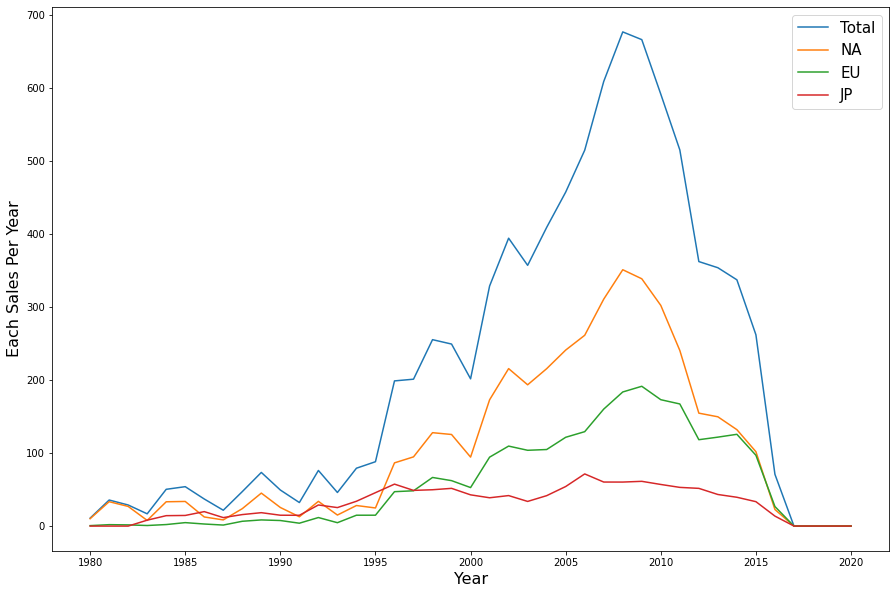

In [81]:
plt.figure(figsize=(15,10))
ax = sns.lineplot(x=df_YT.Year, y=df_YT.Total_Sales)
ax = sns.lineplot(x=df_NT.Year, y=df_NT.NA_Sales)
ax = sns.lineplot(x=df_ET.Year, y=df_ET.EU_Sales)
ax = sns.lineplot(x=df_JT.Year, y=df_JT.JP_Sales)
ax.set_xlabel(xlabel='Year', fontsize=16)
ax.set_ylabel(ylabel='Each Sales Per Year', fontsize=16)
# ax.legend(bbox_to_anchor= (3, 3))
plt.legend(labels = ['Total','NA','EU','JP'],loc = 'upper right',fontsize = 15)
plt.show()

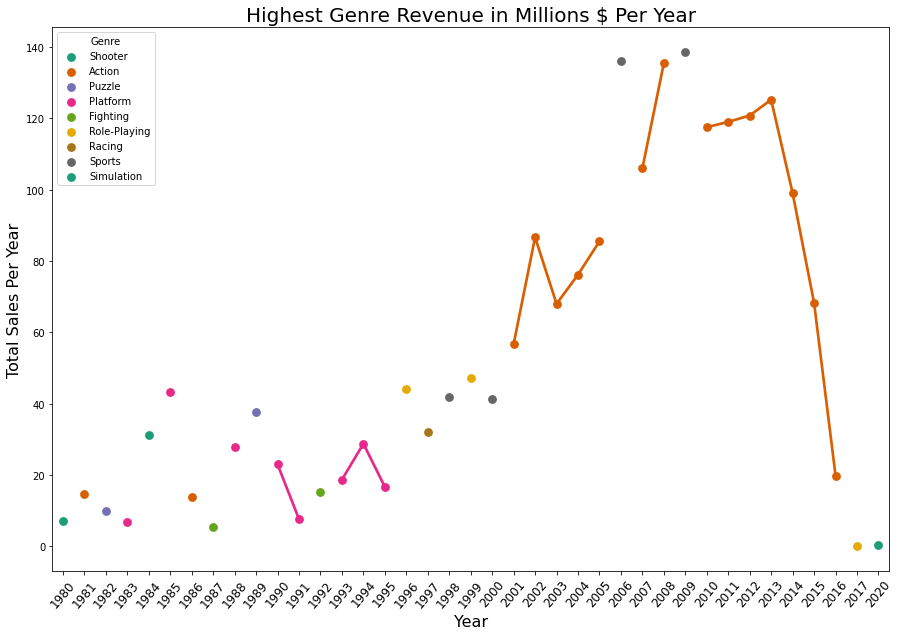

In [82]:
table = df_A.pivot_table('Total_Sales', index='Genre', columns='Year', aggfunc='sum')
genres = table.idxmax()
sales = table.max()
years = table.columns.astype(int)
data = pd.concat([genres, sales], axis=1)
data.columns = ['Genre', 'Total_Sales']

plt.figure(figsize=(15,10))
ax = sns.pointplot(y = 'Total_Sales', x = years, hue='Genre', data=data, size=15, palette='Dark2')
ax.set_xlabel(xlabel='Year', fontsize=16)
ax.set_ylabel(ylabel='Total Sales Per Year', fontsize=16)
ax.set_title(label='Highest Genre Revenue in Millions $ Per Year', fontsize=20)
ax.set_xticklabels(labels = years, fontsize=12, rotation=50)
plt.show();

In [83]:
table = df_A.pivot_table('Total_Sales', index=['Name','Genre'], columns='Year', aggfunc='sum')
table.columns = table.columns.astype(int)
games = table.idxmax()
sales = table.max()
years = table.columns
data = pd.concat([games, sales], axis=1)
data.columns = ['Game', 'Total_Sales']
data

,Game,Total_Sales
Year,,
1980,"(Asteroids, Shooter)",4.31
1981,"(Pitfall!, Platform)",4.50
1982,"(Pac-Man, Puzzle)",7.81
1983,"(Baseball, Sports)",3.20
1984,"(Duck Hunt, Shooter)",28.31
1985,"(Super Mario Bros., Platform)",40.24
1986,"(The Legend of Zelda, Action)",6.50
1987,"(Zelda II: The Adventure of Link, Adventure)",4.38
1988,"(Super Mario Bros. 3, Platform)",17.28


In [84]:
# table

In [85]:
data.sort_values(by = 'Total_Sales',ascending=False).head(10)

,Game,Total_Sales
Year,,
2006,"(Wii Sports, Sports)",82.74
1985,"(Super Mario Bros., Platform)",40.24
2013,"(Grand Theft Auto V, Action)",37.77
2008,"(Mario Kart Wii, Racing)",35.83
2009,"(Wii Sports Resort, Sports)",33.00
1996,"(Pokemon Red/Pokemon Blue, Role-Playing)",31.38
2011,"(Call of Duty: Modern Warfare 3, Shooter)",30.84
1989,"(Tetris, Puzzle)",30.26
2012,"(Call of Duty: Black Ops II, Shooter)",29.73


# Q3. 출고량이 높은 게임에 대한 분석 및 시각화 프로세스

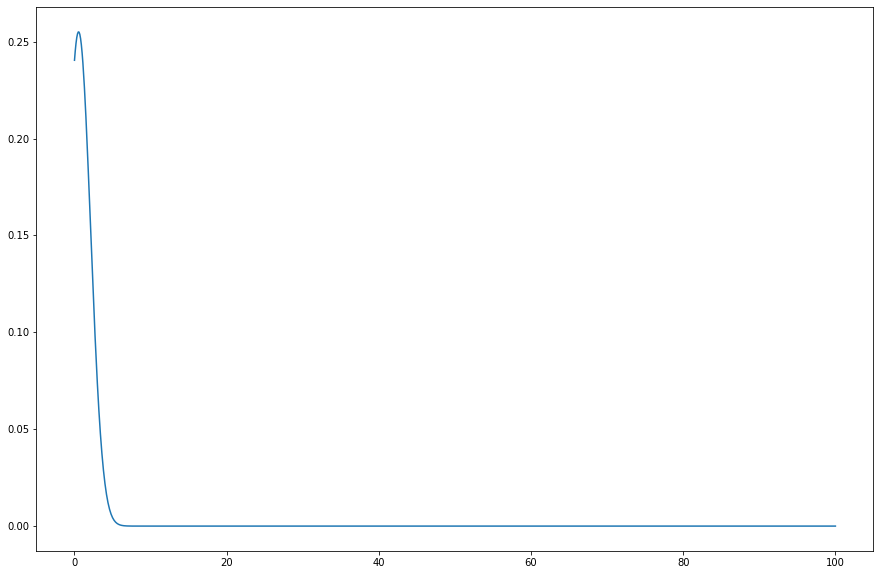

3.1114849494738674

In [86]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
mu = df_A.Total_Sales.mean()
sd = df_A.Total_Sales.std()
rv = stats.norm(mu, sd)
x = np.linspace(0,100,1000)

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)

ax.plot(x, rv.pdf(x))


plt.show()

rv = stats.norm(mu, sd)
rv.ppf(0.95)

# 정규분포

In [87]:
# 상위 5% 게임 출고량은 3.11
df_5p = df_A[df_A.Total_Sales > 3.11]
# df_5p.groupby('Platform').sum()
df_5p

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
119,Call of Duty 4: Modern Warfare,X360,2007.0,Shooter,Activision,5.91,2.38,0.13,0.90,9.32
160,Dragon Quest VII: Warriors of Eden,PS,2000.0,Role-Playing,Enix Corporation,0.20,0.14,4.10,0.02,4.46
189,Left 4 Dead 2,X360,2009.0,Shooter,Electronic Arts,2.67,0.89,0.05,0.37,3.98
220,Just Dance 3,Wii,2011.0,Misc,Ubisoft,6.05,3.15,0.00,1.07,10.27
378,Mario & Sonic at the Olympic Games,DS,2008.0,Sports,Sega,1.64,2.48,0.44,0.58,5.14
...,...,...,...,...,...,...,...,...,...,...
16160,Super Mario Galaxy 2,Wii,2010.0,Platform,Nintendo,3.66,2.42,0.98,0.64,7.70
16176,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.61
16189,Spider-Man 2,PS2,2004.0,Action,Activision,1.75,1.20,0.02,0.43,3.40
16197,Left 4 Dead,X360,2008.0,Shooter,Electronic Arts,2.66,0.50,0.05,0.30,3.51


In [88]:
df_5p[df_5p.Platform == 'DS']

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
378,Mario & Sonic at the Olympic Games,DS,2008.0,Sports,Sega,1.64,2.48,0.44,0.58,5.14
503,Brain Age 2: More Training in Minutes a Day,DS,2005.0,Puzzle,Nintendo,3.44,5.36,5.32,1.18,15.30
3211,Animal Crossing: Wild World,DS,2005.0,Simulation,Nintendo,2.55,3.52,5.33,0.88,12.28
3700,LEGO Batman: The Videogame,DS,2008.0,Action,Warner Bros. Interactive Entertainment,1.79,1.06,0.00,0.29,3.14
4470,Mario & Luigi: Bowser's Inside Story,DS,2009.0,Role-Playing,Nintendo,2.26,0.48,0.81,0.27,3.82
4623,Sonic Rush,DS,2005.0,Platform,Sega,1.22,1.57,0.06,0.29,3.14
4704,Pokemon HeartGold/Pokemon SoulSilver,DS,2009.0,Action,Nintendo,4.40,2.77,3.96,0.77,11.90
4873,Cooking Mama 2: Dinner With Friends,DS,2007.0,Simulation,505 Games,1.61,1.50,0.10,0.39,3.60
4903,Professor Layton and the Diabolical Box,DS,2007.0,Puzzle,Nintendo,0.92,1.78,0.92,0.37,3.99
5107,Dragon Quest IX: Sentinels of the Starry Skies,DS,2009.0,Role-Playing,Nintendo,0.66,0.69,4.35,0.15,5.85


## 플랫폼별 평균

In [89]:
df_5p_2 = df_5p.loc[:,'Name':'Publisher']
df_5p_2['Total_Sales'] = df_5p['Total_Sales']
# df_5p_2 = df_5p_2.drop(['Year'],axis=1)
df_5p_2
df_5p_2mean = df_5p_2.groupby(['Platform']).mean().Total_Sales.sort_values(ascending=False).reset_index()
df_5p_2mean['hues'] = ['Nintendo','Nintendo','Nintendo','Nintendo','XBox','Nintendo','XBox','Nintendo'
,'Nintendo','PlayStation','Nintendo','Others','PlayStation','Others','Others','PlayStation','PlayStation'
,'PC','Nintendo','PlayStation','XBox']
df_5p_2mean

,Platform,Total_Sales,hues
0,Wii,12.113143,Nintendo
1,GB,10.998750,Nintendo
2,NES,9.374000,Nintendo
3,DS,8.150789,Nintendo
4,XB,7.455000,XBox
5,GBA,7.328750,Nintendo
6,X360,6.760755,XBox
7,SNES,6.678462,Nintendo
8,3DS,6.589286,Nintendo
9,PS3,6.194231,PlayStation


Wii는 가정용 비디오 게임 콘솔,
GB는 닌텐도가 출시한 휴대용 게임기,
NES역시 닌텐도에서 발매되었으며 Nintendo Entertainment System의 약자이다.
DS는 닌텐도 DS로 역시 닌텐도에서 발매되었다. 그 외 닌텐도의 기기들은 GBA, SNES, 3DS, N64, WiiU

XB,X360,XOne 소위 말하는 Xbox의 게임들

아타리 2600은 90년대 이전의 게임기로 1977년 발매된 가정용 게임기이다

PS3,PS4,PS2,PS,PSP 플스 게임

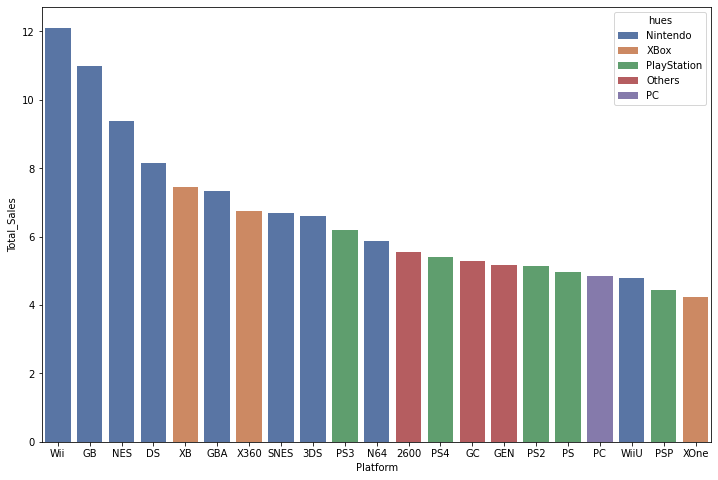

In [90]:
fig = plt.figure(figsize=(12,8))
df_5p_2mean
# plt.barh(df_5p_2mean.index,df_5p_2mean)
sns.barplot(data = df_5p_2mean, y = 'Total_Sales', x = 'Platform',palette='deep',hue = 'hues',dodge=False)
plt.show()

In [91]:
df_5p_2.groupby(['Platform'])['Total_Sales'].describe().reset_index().sort_values(by='50%',ascending=False)

,Platform,count,mean,std,min,25%,50%,75%,max
19,XB,2.0,7.455000,1.449569,6.43,6.9425,7.455,7.9675,8.48
16,Wii,35.0,12.113143,15.306066,3.27,4.1050,6.810,10.8950,82.74
4,GBA,8.0,7.328750,3.920749,4.23,5.4050,5.485,7.4375,15.84
5,GC,6.0,5.283333,1.717576,3.16,3.8600,5.460,6.7900,7.06
3,GB,16.0,10.998750,9.654689,3.41,4.7800,5.325,15.5150,31.38
7,N64,13.0,5.878462,2.724683,3.11,3.6500,5.270,7.6000,11.90
12,PS3,52.0,6.194231,3.439159,3.12,3.9825,5.245,6.7225,21.39
6,GEN,2.0,5.175000,1.195010,4.33,4.7525,5.175,5.5975,6.02
18,X360,53.0,6.760755,4.053880,3.19,4.0700,5.170,8.8400,21.82
2,DS,38.0,8.150789,6.996635,3.11,3.5075,5.050,10.0700,30.01


In [92]:
df_5p_2.groupby(['Platform']).mean().Year.sort_values(ascending=False)

Platform
PS4     2014.600000
XOne    2014.500000
WiiU    2013.571429
3DS     2012.714286
PS3     2010.211538
X360    2009.830189
Wii     2008.628571
DS      2007.105263
PSP     2007.100000
PS2     2003.415385
PC      2003.363636
XB      2002.500000
GBA     2002.125000
GC      2001.666667
PS      1998.159091
N64     1998.000000
GB      1994.375000
SNES    1993.384615
GEN     1991.500000
NES     1986.600000
2600    1981.000000
Name: Year, dtype: float64

In [93]:
df_5p_pp = df_5p_2.groupby(['Platform','Publisher','Genre']).mean().Total_Sales.sort_values(ascending=False)
df_5p_pp['Wii'].to_frame()

Total_Sales
Publisher            Genre                  
Nintendo             Sports        40.115000
                     Racing        35.830000
                     Fighting      13.040000
                     Platform      11.638000
                     Misc           9.570000
Ubisoft              Misc           7.026667
505 Games            Sports         6.810000
LucasArts            Action         5.820000
Nintendo             Action         5.715000
Sega                 Sports         5.470000
Nintendo             Shooter        4.990000
                     Simulation     4.680000
Activision           Misc           4.135000
Take-Two Interactive Misc           4.100000
Electronic Arts      Sports         3.920000

In [94]:
# df_5p_2

In [95]:
df_5p_pp['GB']

Publisher  Genre       
Nintendo   Role-Playing    18.875
           Puzzle          17.800
           Adventure       11.180
           Platform         7.488
           Misc             5.310
           Action           3.840
           Strategy         3.700
           Racing           3.410
Name: Total_Sales, dtype: float64

In [96]:
df_5p_pp['NES']

Publisher         Genre       
Nintendo          Shooter         28.310
                  Platform        21.660
                  Puzzle           5.210
                  Action           5.000
                  Adventure        4.380
Palcom            Action           4.170
Nintendo          Racing           4.160
                  Sports           3.600
Enix Corporation  Role-Playing     3.495
Name: Total_Sales, dtype: float64

In [97]:
df_5p_pp['DS']

Publisher                               Genre       
Nintendo                                Racing          23.430000
                                        Platform        20.215000
                                        Simulation      18.515000
                                        Role-Playing     9.211429
                                        Puzzle           6.975000
                                        Action           6.816667
                                        Misc             6.280000
LucasArts                               Action           4.890000
505 Games                               Simulation       4.660000
Sega                                    Sports           4.335000
Electronic Arts                         Simulation       3.690000
Activision                              Misc             3.480000
Disney Interactive Studios              Adventure        3.160000
Warner Bros. Interactive Entertainment  Action           3.140000
Sega                   

## 장르별 평균

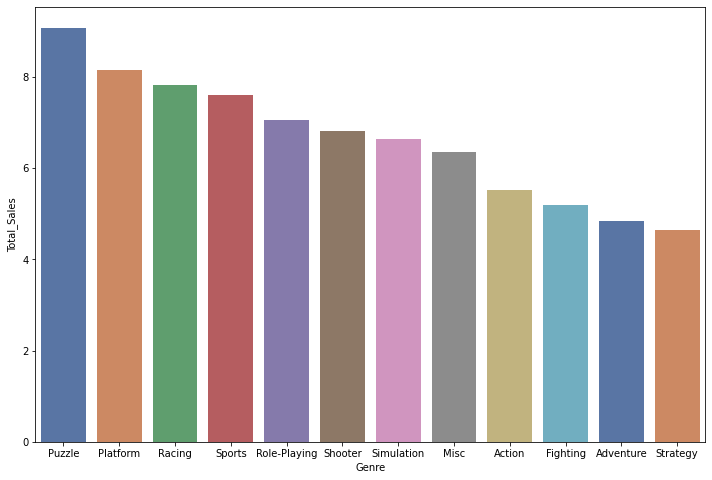

In [98]:
df_5p_gen_mean = df_5p_2.groupby(['Genre']).mean().Total_Sales.sort_values(ascending=False)
df_5p_gen_mean = df_5p_gen_mean.reset_index()
fig = plt.figure(figsize=(12,8))
sns.barplot(data = df_5p_gen_mean, y = 'Total_Sales', x = 'Genre',palette='deep',dodge=False)

plt.show()

In [99]:
df_5p_2.groupby(['Genre'])['Total_Sales'].describe()

,count,mean,std,min,25%,50%,75%,max
Genre,,,,,,,,
Action,97.0,5.523505,3.417822,3.13,3.5400,4.480,5.8200,21.39
Adventure,8.0,4.848750,2.713292,3.12,3.2125,3.860,5.0100,11.18
Fighting,18.0,5.198333,2.446475,3.20,3.4750,4.145,6.1525,13.04
Misc,40.0,6.353250,5.464259,3.11,3.6650,4.220,6.7300,29.01
Platform,51.0,8.153529,7.451571,3.14,4.0100,5.270,8.5000,40.24
Puzzle,9.0,9.081111,8.706350,3.36,4.8400,5.340,7.8100,30.26
Racing,32.0,7.828437,6.709192,3.11,4.0200,5.185,9.5850,35.83
Role-Playing,52.0,7.049038,5.416054,3.12,3.9800,5.205,7.8450,31.38
Shooter,68.0,6.811765,4.376313,3.15,3.6175,5.135,8.1875,28.31


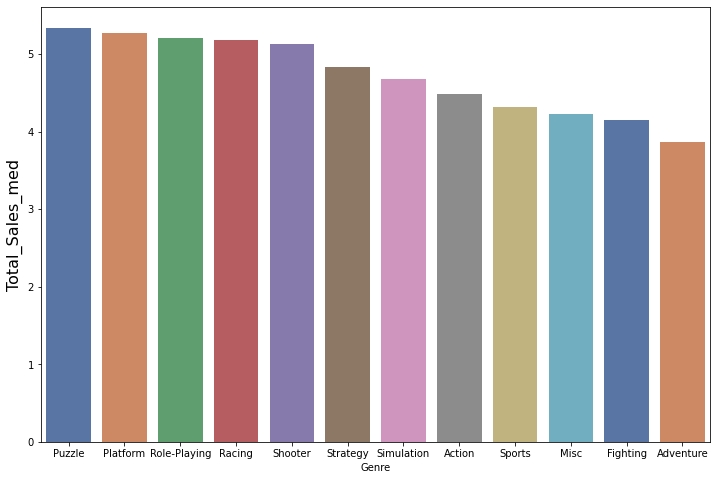

In [100]:
med1 = df_5p_2.groupby(['Genre'])['Total_Sales'].describe().reset_index().sort_values(by='50%',ascending=False)
fig = plt.figure(figsize=(12,8))
ax = sns.barplot(data = med1, y = '50%', x = 'Genre',palette='deep',dodge=False)
ax.set_ylabel(ylabel='Total_Sales_med', fontsize=16)
plt.show()

In [101]:
df_5p_2[df_5p_2.Genre == 'Puzzle']

,Name,Platform,Year,Genre,Publisher,Total_Sales
503,Brain Age 2: More Training in Minutes a Day,DS,2005.0,Puzzle,Nintendo,15.30
1187,Tetris,GB,1989.0,Puzzle,Nintendo,30.26
2469,Dr. Mario,NES,1990.0,Puzzle,Nintendo,4.84
4903,Professor Layton and the Diabolical Box,DS,2007.0,Puzzle,Nintendo,3.99
5699,Pac-Man,2600,1982.0,Puzzle,Atari,7.81
6469,Professor Layton and the Curious Village,DS,2007.0,Puzzle,Nintendo,5.25
6803,Professor Layton and the Unwound Future,DS,2008.0,Puzzle,Nintendo,3.36
10832,Tetris,NES,1988.0,Puzzle,Nintendo,5.58
11446,Dr. Mario,GB,1989.0,Puzzle,Nintendo,5.34


In [102]:
df_5p_2.groupby(['Genre'])['Year'].describe().reset_index().sort_values(by='mean',ascending=False)

,Genre,count,mean,std,min,25%,50%,75%,max
8,Shooter,68.0,2008.191176,7.056821,1980.0,2005.75,2010.0,2013.00,2016.0
3,Misc,40.0,2007.150000,4.400175,1995.0,2006.00,2007.0,2010.00,2014.0
10,Sports,47.0,2007.021277,6.615165,1983.0,2004.50,2008.0,2010.50,2016.0
0,Action,97.0,2005.814433,6.764383,1985.0,2001.00,2007.0,2011.00,2015.0
7,Role-Playing,52.0,2005.750000,6.474308,1988.0,2001.75,2007.0,2010.00,2015.0
9,Simulation,15.0,2005.466667,4.911599,1996.0,2001.50,2006.0,2008.50,2013.0
6,Racing,32.0,2002.843750,6.735124,1984.0,1999.00,2003.5,2007.25,2014.0
1,Adventure,8.0,2002.500000,9.023778,1987.0,1996.50,2007.0,2008.50,2011.0
2,Fighting,18.0,2001.000000,6.650962,1992.0,1996.50,2000.0,2004.25,2014.0
11,Strategy,5.0,2000.200000,5.718391,1995.0,1998.00,1999.0,1999.00,2010.0


# 추가 Q. 그럼 어떤 게임을 내야할까

In [103]:
df_today = df_A[(df_A.Year > 2007)]
# 최근 10년간 데이터
# 각 장르의 기댓값, 편차
df_today

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00,0.04
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25
...,...,...,...,...,...,...,...,...,...,...
16227,LEGO Indiana Jones 2: The Adventure Continues,Wii,2009.0,Action,Activision,0.91,0.39,0.00,0.13,1.43
16231,MindJack,PS3,2011.0,Shooter,Square Enix,0.07,0.08,0.00,0.03,0.18
16233,White Album: Tsuzurareru Fuyu no Omoide,PS3,2010.0,Adventure,Aqua Plus,0.00,0.00,0.05,0.00,0.05
16238,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,0.79


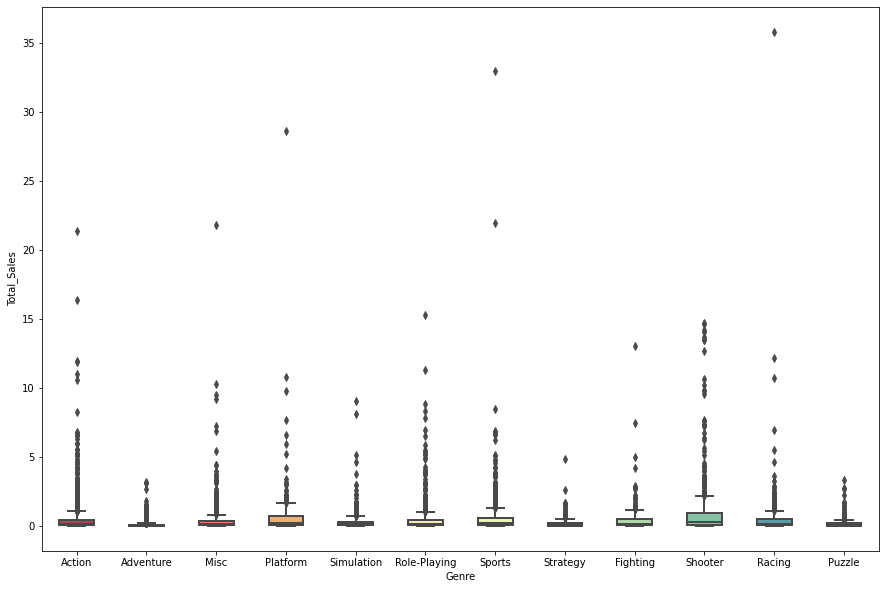

In [104]:
fig = plt.figure(figsize=(15,10))
sns.boxplot(x = 'Genre', y = 'Total_Sales', data = df_today, palette = 'Spectral', linewidth = 2, width = 0.5)

(0.0, 2.0)

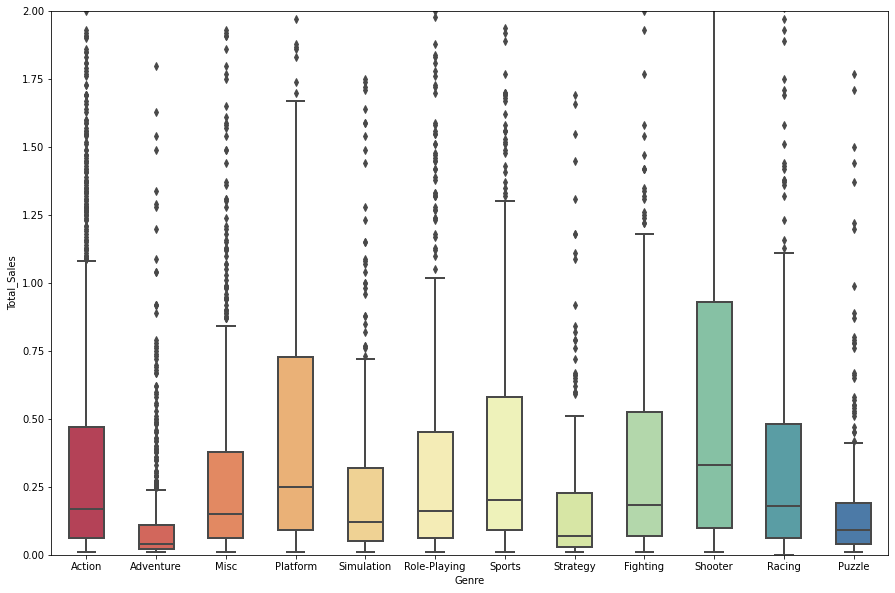

In [105]:
fig = plt.figure(figsize=(15,10))
sns.boxplot(x = 'Genre', y = 'Total_Sales', data = df_today, palette = 'Spectral', linewidth = 2, width = 0.5)
plt.ylim([0, 2])

(0.0, 2.0)

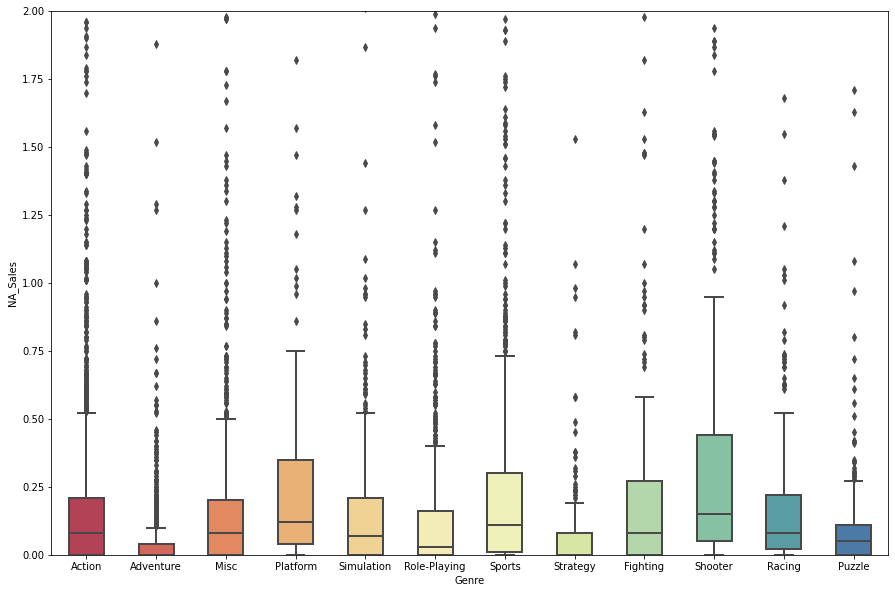

In [106]:
fig = plt.figure(figsize=(15,10))
sns.boxplot(x = 'Genre', y = 'NA_Sales', data = df_today, palette = 'Spectral', linewidth = 2, width = 0.5)
plt.ylim([0, 2])

(0.0, 1.0)

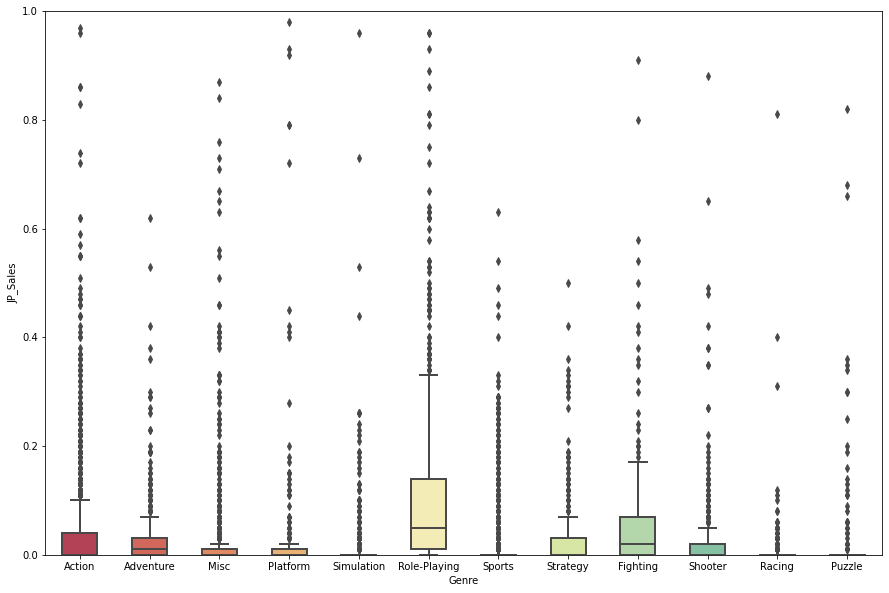

In [107]:
fig = plt.figure(figsize=(15,10))
sns.boxplot(x = 'Genre', y = 'JP_Sales', data = df_today, palette = 'Spectral', linewidth = 2, width = 0.5)
plt.ylim([0, 1])

# 플랫폼별

(0.0, 2.0)

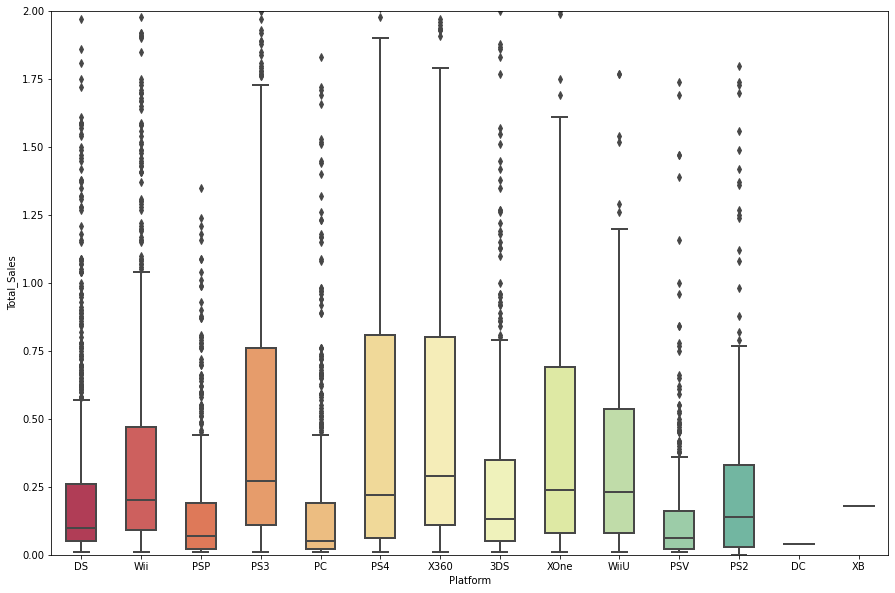

In [108]:
fig = plt.figure(figsize=(15,10))
sns.boxplot(x = 'Platform', y = 'Total_Sales', data = df_today, palette = 'Spectral', linewidth = 2, width = 0.5)
plt.ylim([0, 2])

(0.0, 2.0)

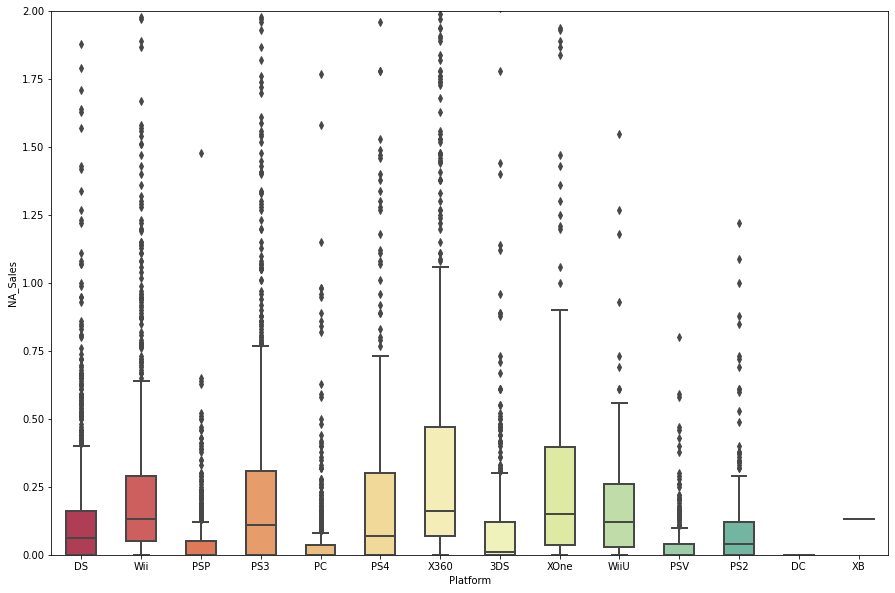

In [109]:
fig = plt.figure(figsize=(15,10))
sns.boxplot(x = 'Platform', y = 'NA_Sales', data = df_today, palette = 'Spectral', linewidth = 2, width = 0.5)
plt.ylim([0, 2])

(0.0, 1.0)

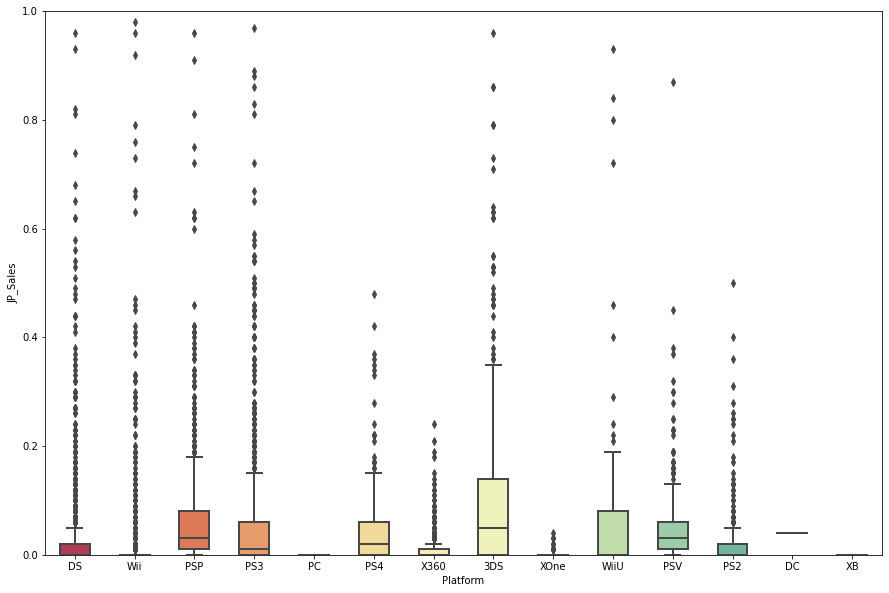

In [110]:
fig = plt.figure(figsize=(15,10))
sns.boxplot(x = 'Platform', y = 'JP_Sales', data = df_today, palette = 'Spectral', linewidth = 2, width = 0.5)
plt.ylim([0, 1])

In [111]:
df_today.groupby(['Genre','Platform'])['Total_Sales'].describe().reset_index().sort_values(by='mean',ascending=False).head(5)

,Genre,Platform,count,mean,std,min,25%,50%,75%,max
81,Racing,WiiU,3.0,2.593333,3.783878,0.28,0.4100,0.54,3.750,6.96
101,Shooter,PS4,34.0,2.215294,2.966535,0.01,0.2325,1.26,3.215,14.24
57,Platform,Wii,43.0,1.629767,4.504310,0.01,0.1050,0.34,1.165,28.61
107,Shooter,XOne,33.0,1.563333,1.722922,0.01,0.3300,0.85,2.860,7.29
72,Racing,3DS,10.0,1.443000,3.785760,0.10,0.1475,0.21,0.440,12.21


In [112]:
df_today.groupby(['Genre','Platform'])['NA_Sales'].describe().reset_index().sort_values(by='mean',ascending=False).head(5)

,Genre,Platform,count,mean,std,min,25%,50%,75%,max
81,Racing,WiiU,3.0,1.156667,1.709220,0.14,0.17,0.200,1.6650,3.13
107,Shooter,XOne,33.0,0.963030,1.093945,0.01,0.19,0.520,1.8400,4.52
106,Shooter,X360,158.0,0.877215,1.788047,0.00,0.08,0.215,0.6450,9.67
57,Platform,Wii,43.0,0.852791,2.289029,0.00,0.09,0.220,0.6100,14.59
101,Shooter,PS4,34.0,0.824118,1.184473,0.01,0.06,0.415,1.0625,5.77


In [113]:
df_today.groupby(['Genre','Platform'])['EU_Sales'].describe().reset_index().sort_values(by='mean',ascending=False).head(5)

,Genre,Platform,count,mean,std,min,25%,50%,75%,max
101,Shooter,PS4,34.0,0.975000,1.240196,0.00,0.1250,0.610,1.3975,5.81
81,Racing,WiiU,3.0,0.820000,1.085127,0.12,0.1950,0.270,1.1700,2.07
125,Sports,PS4,43.0,0.532093,1.225222,0.00,0.0400,0.130,0.4100,6.06
100,Shooter,PS3,138.0,0.482319,0.943740,0.00,0.0625,0.205,0.4000,5.88
107,Shooter,XOne,33.0,0.462727,0.495973,0.00,0.1100,0.250,0.6800,2.09


In [114]:
df_today.groupby(['Genre','Platform'])['JP_Sales'].describe().reset_index().sort_values(by='mean',ascending=False).head(5)

,Genre,Platform,count,mean,std,min,25%,50%,75%,max
81,Racing,WiiU,3.0,0.430000,0.727530,0.0,0.01,0.020,0.6450,1.27
84,Role-Playing,3DS,84.0,0.419524,0.746293,0.0,0.06,0.135,0.3925,3.44
108,Simulation,3DS,28.0,0.368571,0.897547,0.0,0.00,0.035,0.1950,4.36
85,Role-Playing,DS,126.0,0.281746,0.747676,0.0,0.01,0.070,0.1600,5.65
72,Racing,3DS,10.0,0.281000,0.840244,0.0,0.00,0.000,0.0150,2.67
